## Implement k-fold cross-validation for hyperparameter selection
### Also deep into regression

In [208]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 

In [209]:
dataset = load_diabetes(as_frame=True)
print(dataset.DESCR)
X, y = dataset.data, dataset.target

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [210]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [211]:
X.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


X is scaled

In [212]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 442 entries, 0 to 441
Series name: target
Non-Null Count  Dtype  
--------------  -----  
442 non-null    float64
dtypes: float64(1)
memory usage: 3.6 KB


In [213]:
y.describe()

count    442.000000
mean     152.133484
std       77.093005
min       25.000000
25%       87.000000
50%      140.500000
75%      211.500000
max      346.000000
Name: target, dtype: float64

In [214]:
X, y = X.to_numpy(), y.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True)
# X_train, X_test = X_train.to_numpy(), X_test.to_numpy()
# y_train, y_test = y_train.to_numpy(), y_test.to_numpy()

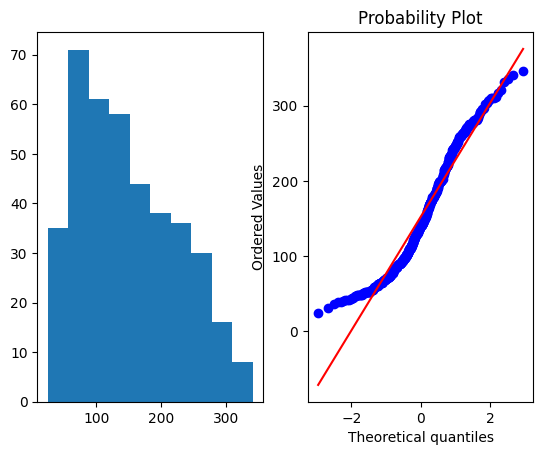

In [215]:
from scipy import stats
fig, axes= plt.subplots(1, 2)
axes[0].hist(y_train)
stats.probplot(y, dist='norm', plot=axes[1])
plt.show()

that's not normal distribution - it's better to use MAE

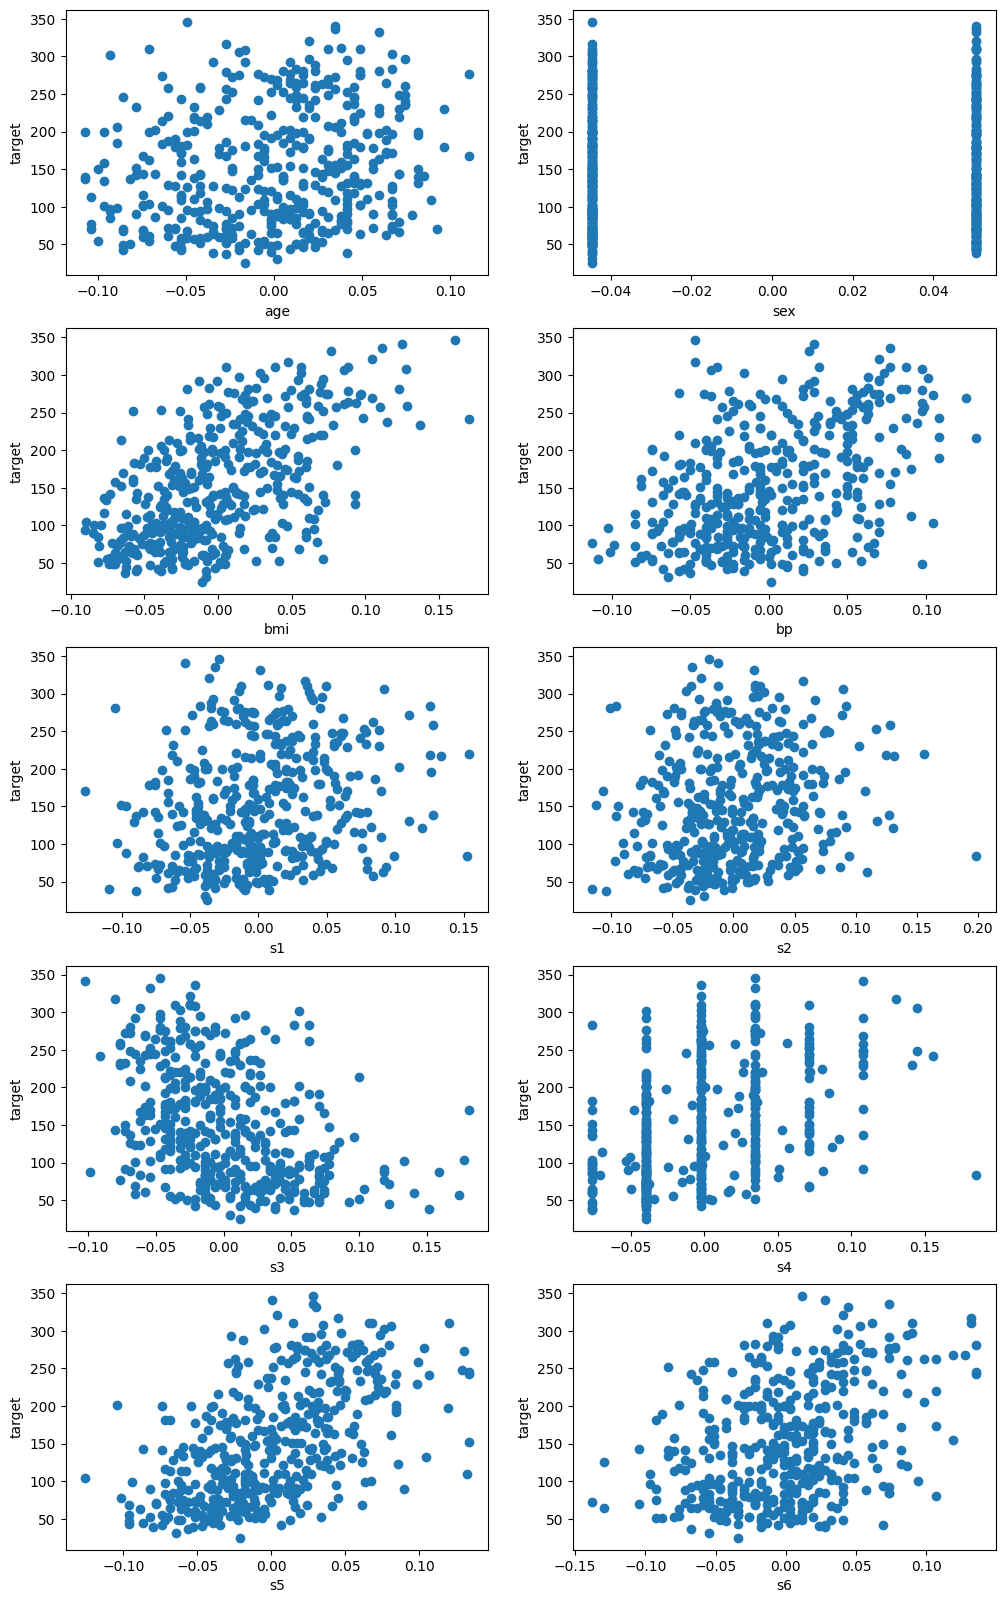

In [217]:
fig, axes = plt.subplots(5, 2, figsize=(12, 20))
axes = axes.flatten()
for i, feature_name in enumerate(dataset.data.columns):    
    axes[i].scatter(X[:, i], y)
    axes[i].set_xlabel(feature_name)
    axes[i].set_ylabel('target')

As we can see, linear regression is not capable of accurately predicting such data.


In [225]:
model = SGDRegressor(random_state=42, max_iter=100000, penalty='l1')
param_grid = [
    {
        'alpha': [0.0001, 0.001, 0.01],
        'learning_rate': ['constant', 'invscaling'],
        'eta0': [0.001, 0.01, 0.1], 
    },
    
    {
        'alpha': [0.0001, 0.001, 0.01],
        'learning_rate': ['optimal'],
    },
    {
        'alpha': [0.0001, 0.001, 0.01],
        'learning_rate': ['adaptive'],
        'eta0': [0.001, 0.01, 0.1], 
    }
]

In [226]:
cv = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error')
cv.fit(X_train, y_train)

c:\Users\konst\Desktop\ML\yandex_ml_handbook\venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\konst\Desktop\ML\yandex_ml_handbook\venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\konst\Desktop\ML\yandex_ml_handbook\venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\konst\Desktop\ML\yandex_ml_handbook\venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing ma

GridSearchCV(cv=5,
             estimator=SGDRegressor(max_iter=100000, penalty='l1',
                                    random_state=42),
             param_grid=[{'alpha': [0.0001, 0.001, 0.01],
                          'eta0': [0.001, 0.01, 0.1],
                          'learning_rate': ['constant', 'invscaling']},
                         {'alpha': [0.0001, 0.001, 0.01],
                          'learning_rate': ['optimal']},
                         {'alpha': [0.0001, 0.001, 0.01],
                          'eta0': [0.001, 0.01, 0.1],
                          'learning_rate': ['adaptive']}],
             scoring='neg_mean_absolute_error')

In [227]:
from sklearn.metrics import mean_absolute_error
print(cv.best_params_)
print('best mae on validation set', -cv.best_score_)
print('mae on test set', mean_absolute_error(y_test, cv.best_estimator_.predict(X_test)))
print('r2 on test set', cv.best_estimator_.score(X_test, y_test))

{'alpha': 0.0001, 'eta0': 0.1, 'learning_rate': 'adaptive'}
best mae on validation set 43.62038066060036
mae on test set 48.5035119859228
r2 on test set 0.5300030259933091


In [228]:
from itertools import product
from sklearn.base import clone

class MyGridSearchCV:
    def __init__(self,estimator, cv, param_grid):
        self.param_grid = [param_grid] if isinstance(param_grid, dict) else param_grid
        self.kfold = KFold(n_splits=cv)
        self.estimator = estimator
        self.best_model_ = estimator
        self.best_params_ = None
        self.best_score_ = -float('inf') # in out case it's r2        
    def fit(self, X, y):                        
        for grid in self.param_grid:
            keys = list(grid.keys())            
            for combo in product(*grid.values()):
                params = dict(zip(keys, combo))                                                                                    
                for train_index, val_index in self.kfold.split(X):                                            
                    X_train = X[train_index]
                    X_val = X[val_index]
                    y_train = y[train_index]
                    y_val = y[val_index]

                    model = clone(self.estimator)
                    model.set_params(**params)
                    model.fit(X_train, y_train)
                    y_pred = model.predict(X_val)
                    score = -mean_absolute_error(y_val, y_pred)

                    if score > self.best_score_:
                        self.best_params_ = params
                        self.best_model_ = model
                        self.best_score_ = score
        

my_cv = MyGridSearchCV(model, 5, param_grid)

my_cv.fit(X_train, y_train)

c:\Users\konst\Desktop\ML\yandex_ml_handbook\venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\konst\Desktop\ML\yandex_ml_handbook\venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\konst\Desktop\ML\yandex_ml_handbook\venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\konst\Desktop\ML\yandex_ml_handbook\venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing ma

In [230]:
print(my_cv.best_params_)
print('best mae on validation set', -my_cv.best_score_)
print('mae on test set', mean_absolute_error(y_test, my_cv.best_model_.predict(X_test)))
print('r2 on test set', my_cv.best_model_.score(X_test, y_test))

{'alpha': 0.0001, 'learning_rate': 'adaptive', 'eta0': 0.1}
best mae on validation set 41.275623935993366
mae on test set 48.86572352457085
r2 on test set 0.5243169582462075
